In [1]:
# #-------------------------------------------------
# #Utility function for displaying filters as images
# #-------------------------------------------------

# def deprocess_image(x):
    
#     x -= x.mean()
#     x /= (x.std() + 1e-5)
#     x *= 0.1
#     x += 0.5
#     x = np.clip(x, 0, 1)
#     x *= 255
#     x = np.clip(x, 0, 255).astype('uint8')
#     return x

# #---------------------------------------------------------------------------------------------------
# #Utility function for generating patterns for given layer starting from empty input image and then 
# #applying Stochastic Gradient Ascent for maximizing the response of particular filter in given layer
# #---------------------------------------------------------------------------------------------------

# def generate_pattern(layer_name, filter_index, size=150):
    
#     layer_output = model.get_layer(layer_name).output
#     loss = K.mean(layer_output[:, :, :, filter_index])
#     grads = K.gradients(loss, model.input)[0]
#     grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
#     iterate = K.function([model.input], [loss, grads])
#     input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
#     step = 1.
#     for i in range(80):
#         loss_value, grads_value = iterate([input_img_data])
#         input_img_data += grads_value * step
        
#     img = input_img_data[0]
#     return deprocess_image(img)


def hand_scan(img_path):
    
    
    
#     model = model(weights=model.load_weights)
    
#     img=mpimg.imread(img_path)
#     plt.imshow(img)
#     from keras.preprocessing import image
#     import numpy as np
#     img = image.load_img(img_path, target_size=(299, 299))
#     x = image.img_to_array(img)
#     print(x.shape)
#     x = np.expand_dims(x, axis=0)
#     print(x.shape)
#     from keras.applications.vgg16 import preprocess_input
#     import pandas as pd
#     x = preprocess_input(x, data_format='channels_last')
#     preds = model.predict(x)
#     decode_predictions = tf.keras.applications.imagenet_utils.decode_predictions(preds, top=3)
#     print(decode_predictions)
#     predictions = pd.DataFrame(decode_predictions[0],columns=['col1','category','probability']).iloc[:,1:]
#     print(predictions)
#     argmax = np.argmax(preds[0])
#     output = model.output[:, argmax]
#     last_conv_layer = model.get_layer('conv2d_93')
#     grads = K.gradients(output, last_conv_layer.output)[0]
#     pooled_grads = K.mean(grads, axis=(0, 1, 2))
#     iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
#     pooled_grads_value, conv_layer_output_value = iterate([x])
#     for i in range(32):
#         conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
#     heatmap = np.mean(conv_layer_output_value, axis=-1)
#     heatmap = np.maximum(heatmap, 0)
#     heatmap /= np.max(heatmap)
#     import cv2
#     img = cv2.imread(img_path)
#     heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
#     heatmap = np.uint8(255 * heatmap)
#     heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#     hif = .8
#     superimposed_img = heatmap * hif + img
#     output = '/Users/rvupp/opt/anaconda3/output.jpeg'
#     cv2.imwrite(output, superimposed_img)
#     img=mpimg.imread(output)
#     plt.figure(figsize=(20,20))
#     plt.imshow(img)
#     plt.axis('off')
#     plt.title(predictions.loc[0,'category'].upper())

    import tensorflow as tf
    from tensorflow.keras import models
    tf.compat.v1.disable_eager_execution()
    import matplotlib.image as mpimg
    from tensorflow.keras import backend as K
    import matplotlib.pyplot as plt
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.layers import Input
    
    %matplotlib inline
    K.clear_session()
    
    # load saved model from disk
    model = tf.keras.models.load_model('/Users/rvupp/opt/anaconda3/inceptionv3_fracture_detection_hand_model_keras_4_150layers_trained.h5')
    print(model.summary())
    model.load_weights('/Users/rvupp/opt/anaconda3/inceptionv3_fracture_detection_hand_model_weights_4_150layers_trained.h5')
    
    test_image = img_path
    
    img=mpimg.imread(test_image)
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    from tensorflow.keras.preprocessing import image
    import numpy as np
    import pandas as pd
    img = image.load_img(test_image, target_size=(299, 299))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    print(img_tensor.shape)
    print(type(img_tensor))
    
#     img_tensor = np.expand_dims(img_tensor, axis=0)
#     
    img_tensor = tf.convert_to_tensor(img_tensor)
    from tensorflow.keras.applications.inception_v3 import preprocess_input
    x = preprocess_input(img_tensor, data_format='channels_last')
    print(type(x))
    print(x.shape)
    preds = model.predict(x, steps=1)
    
    decode_predictions = tf.keras.applications.imagenet_utils.decode_predictions(preds, top=3)
    
    print(decode_predictions)
    
    predictions = pd.DataFrame(decode_predictions[0],columns=['col1','category','probability']).iloc[:,1:]
    print(predictions)
#     print(img_tensor.shape)

#     img = image.load_img(test_image, target_size=(IMG_SIZE[0], IMG_SIZE[1]))
#     img_tensor = image.img_to_array(img)
#     img_tensor = np.expand_dims(img_tensor, axis=0)
    
    # Determine proper input shape
#     input_shape = (299,299,3)

#     if img_tensor is None:
#         img_tensor = tf.keras.layers.Input(shape=input_shape)
#     else:
#         img_tensor = tf.keras.layers.Input(tensor=img_tensor, shape=input_shape)

# #     img_tensor /= 255.
    
#     print(img_tensor.shape)
#     print(type(img_tensor))
    
    
    
#     # load saved model from disk
#     model = tf.keras.models.load_model('/Users/rvupp/opt/anaconda3/inceptionv3_fracture_detection_hand_model_keras.h5')
#     print(model.summary())
#     # load weights from disk into new model
#     model.load_weights('/Users/rvupp/opt/anaconda3/inceptionv3_fracture_detection_hand_model_weights.h5')
    
    # evaluate loaded model on test data
#     learning_rate =  0.0001
#     opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#     model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])
    
#     print(str(model.input_shape) + " Input Shape")
    
        #---------------------------------------------------------------------------------------
#Getting outputs for intermediate convolution layers by running prediction on test image
#---------------------------------------------------------------------------------------


    
    layer_outputs = [layer.output for layer in model.layers[:50]]
    print(layer_outputs)
    
    activation_model = models.Model(inputs=model.inputs, outputs=layer_outputs)
#     score = model.evaluate(img_tensor, Y, verbose=0)
#     print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
    


#     activation_model = models.Model(inputs=model.inputs, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor, steps = 1)

    layer_names = ['conv2d_1', 'activation_1', 'conv2d_4', 'activation_4', 'conv2d_9', 'activation_9']
    activ_list = [activations[1], activations[3], activations[11], activations[13], activations[18], activations[20]]

    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activ_list):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
    
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(2*scale * display_grid.shape[1], 2*scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='plasma')
        plt.savefig(layer_name+"_grid.jpg", bbox_inches='tight')


#-------------------------------------------------
#Utility function for displaying filters as images
#-------------------------------------------------

    def deprocess_image(x):
    
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 0.1
        x += 0.5
        x = np.clip(x, 0, 1)
        x *= 255
        x = np.clip(x, 0, 255).astype('uint8')
        return x

#---------------------------------------------------------------------------------------------------
#Utility function for generating patterns for given layer starting from empty input image and then 
#applying Stochastic Gradient Ascent for maximizing the response of particular filter in given layer
#---------------------------------------------------------------------------------------------------

    def generate_pattern(layer_name, filter_index, size=150):
    
        layer_output = model.get_layer(layer_name).output
        loss = K.mean(layer_output[:, :, :, filter_index])
        grads = K.gradients(loss, model.input)[0]
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
        iterate = K.function([model.input], [loss, grads])
        input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
        step = 1.
        for i in range(80):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step
        
        img = input_img_data[0]
        return deprocess_image(img)

#------------------------------------------------------------------------------------------
#Generating convolution layer filters for intermediate layers using above utility functions
#------------------------------------------------------------------------------------------

    layer_name = 'conv2d_4'
    size = 299
    margin = 5
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):
        for j in range(8):
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
    plt.figure(figsize=(20, 20))
    plt.savefig(results)


#-----------------------------------------------------------------------------------
#Here, I am initializing an InceptionV3 model and making prediction on a test image.
#Following which, I am creating a activaton heatmap of the last layer of this model,
#which is a mixed layer. This heatmap is then superimposed on the original image.
#-----------------------------------------------------------------------------------

    model = InceptionV3(weights='imagenet')
#     img_path = 'any test image'

#     img = image.load_img(img_path, target_size=(IMG_SIZE[0], IMG_SIZE[1]))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
    
    test_image = img_path
    
    img=mpimg.imread(test_image)
    plt.imshow(img)
    from keras.preprocessing import image
    import numpy as np
    img = image.load_img(img_path, target_size=(299, 299))
    img_tensor = image.img_to_array(img)
    print(img_tensor.shape)
#     img_tensor = np.expand_dims(img_tensor, axis=0)
    print(img_tensor.shape)
    img_tensor = tf.convert_to_tensor(img_tensor)

    preds = model.predict(img_tensor)
    print ("Predicted: ", decode_predictions(preds, top=3)[0])

#985 is the class index for class 'Daisy' in Imagenet dataset on which my model is pre-trained
    flower_output = model.output[:, 985]
    last_conv_layer = model.get_layer('mixed10')

    grads = K.gradients(flower_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])

#2048 is the number of filters/channels in 'mixed10' layer
    for i in range(2048):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    plt.savefig(heatmap)
    plt.imshow(heatmap)

#Using cv2 to superimpose the heatmap on original image to clearly illustrate activated portion of image
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + img
    cv2.imwrite('image_name.jpg', superimposed_img)
    plt.imshow(superimposed_img)
    
    return None

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
___________

InvalidArgumentError: input_1:0 is both fed and fetched.

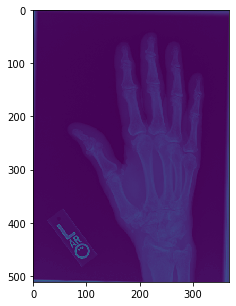

In [2]:
image_path = '/Users/rvupp/opt/anaconda3/BoneFractureDetectionMURA/MURA-v1.1/valid/XR_HAND/patient11247/study1_positive/image4.png'
hand_scan(image_path)